In [7]:
def f(x):
    return x*x

In [8]:
f(2)


4

In [15]:
def diff(f, x):
    d = 0.000001
    y1 = f(x)
    y2 = f(x+d)
    return (y2-y1)/d

In [10]:
diff(f, x=20)

40.000001035878086

In [11]:
def f1(x):
    return x**3 + 2*x + 5

In [12]:
diff(f1, x=10)

302.0000299329695

In [13]:
d = 1e-8
y1 = f1(10)
y2 = f1(10 + d)
(y2-y1)/d

302.00003493519034

In [18]:
def diff1(f, x):
    d = 1e-8
    y1 = f(x-d)
    y2 = f(x+d)
    return (y2-y1)/(2*d)

In [19]:
diff1(f1, x=10)

302.00003493519034

In [ ]:
def loss(yp, y):
    return np.sum((yp - y)**2)

In [ ]:
def compute_gradient(weights, bias, i, loss_func, X, y):
    yp = weights*X + bias
    l = loss_fun(yp, y)
    

In [36]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000, loss_fn=None, epsilon=1e-5):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.loss_fn = loss_fn
        self.epsilon = epsilon  # small perturbation for numerical gradient
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        n_samples, n_features = X.shape

        # Randomly initialize weights and bias
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            loss = self.loss_fn(y, y_pred)
            print("Weights, Bias: ", self.weights, self.bias)
            print("Loss: ", loss)
            
            # Approximate gradient for weights
            dw = np.zeros_like(self.weights)
            for i in range(len(self.weights)):
                original_value = self.weights[i]

                self.weights[i] = original_value + self.epsilon
                y_pred_plus = np.dot(X, self.weights) + self.bias
                loss_plus = self.loss_fn(y, y_pred_plus)

                self.weights[i] = original_value - self.epsilon
                y_pred_minus = np.dot(X, self.weights) + self.bias
                loss_minus = self.loss_fn(y, y_pred_minus)

                dw[i] = (loss_plus - loss_minus) / (2 * self.epsilon)

                self.weights[i] = original_value  # restore original weight

            # Approximate gradient for bias
            original_bias = self.bias

            self.bias = original_bias + self.epsilon
            y_pred_plus = np.dot(X, self.weights) + self.bias
            loss_plus = self.loss_fn(y, y_pred_plus)

            self.bias = original_bias - self.epsilon
            y_pred_minus = np.dot(X, self.weights) + self.bias
            loss_minus = self.loss_fn(y, y_pred_minus)

            db = (loss_plus - loss_minus) / (2 * self.epsilon)

            self.bias = original_bias  # restore original bias

            # Gradient descent update
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return np.dot(X, self.weights) + self.bias

# ----- Example loss function: MSE -----
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [37]:

X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

model = LinearRegressionGD(
    learning_rate=0.01,
    n_iterations=300,
    loss_fn=mse_loss
)
model.fit(X, y)

preds = model.predict([6, 7])
print("Predictions:", preds)


Weights, Bias:  [0.47156374] 0.3587226254106415
Loss:  22.536265377933223
Weights, Bias:  [0.78629636] 0.4432543486034237
Loss:  13.172439742699405
Weights, Bias:  [1.0267159] 0.5072114801311602
Loss:  7.715399630317227
Weights, Bias:  [1.21040571] 0.5554642966136238
Loss:  4.535042504841057
Weights, Bias:  [1.3507886] 0.5917306679560876
Loss:  2.6814252973638544
Weights, Bias:  [1.45811127] 0.6188487387390154
Loss:  1.6009682037489732
Weights, Bias:  [1.54019586] 0.6389850879994732
Loss:  0.9710723080808051
Weights, Bias:  [1.60301367] 0.6537936344461717
Loss:  0.6037429210953162
Weights, Bias:  [1.65112304] 0.664536941675671
Loss:  0.38942603308760465
Weights, Bias:  [1.68800376] 0.6721788202622105
Loss:  0.2642789791345217
Weights, Bias:  [1.7163122] 0.6774550184346042
Loss:  0.19109740311573753
Weights, Bias:  [1.73807622] 0.6809271859895785
Loss:  0.14820043658517296
Weights, Bias:  [1.75484382] 0.6830240693164554
Loss:  0.12295353127415214
Weights, Bias:  [1.76779673] 0.684072958

In [41]:
X = np.array([10, 2, 30, 14, 13, 7]) #age 
y = np.array([0, 0, 1, 1, 1, 0]) #anyone above 13 is called 1, else 0

model = LinearRegressionGD(
    learning_rate=0.001,
    n_iterations=300,
    loss_fn=mse_loss
)
model.fit(X, y)

preds = model.predict([16, 7, 13])
print("Predictions:", preds)


Weights, Bias:  [-1.73724945] -0.2893769896522752
Loss:  759.8788573032142
Weights, Bias:  [-0.88977866] -0.24378791620369322
Loss:  210.31078643279372
Weights, Bias:  [-0.44403399] -0.2197592809571841
Loss:  58.273681631523665
Weights, Bias:  [-0.20958669] -0.20707090139912732
Loss:  16.21286030103412
Weights, Bias:  [-0.08627625] -0.20034723018697742
Loss:  4.5767956828803635
Weights, Bias:  [-0.02142088] -0.19676087072117598
Loss:  1.357689636472391
Weights, Bias:  [0.01268866] -0.1948246867003639
Loss:  0.4671212508198526
Weights, Bias:  [0.03062671] -0.19375648350601238
Loss:  0.22073896326535433
Weights, Bias:  [0.04005899] -0.19314484731190212
Loss:  0.15256970325089952
Weights, Bias:  [0.04501744] -0.1927733852409355
Loss:  0.13370279243980376
Weights, Bias:  [0.04762279] -0.19252828030822566
Loss:  0.12847530513177205
Weights, Bias:  [0.04899047] -0.19234966775152101
Loss:  0.1270211519761045
Weights, Bias:  [0.04970716] -0.19220606025931203
Loss:  0.12661089567897024
Weights,

In [43]:
preds = model.predict([16, 7, 13, 12, 18, 19])
preds

array([0.61986981, 0.17860595, 0.47278185, 0.42375254, 0.71792844,
       0.76695776])

In [40]:
X = np.array([10, 2, 30, 14, 13, 7])
X = X.reshape(-1, 1)

In [33]:
w = np.random.randn(1)

In [34]:
w

array([0.65694806])

In [35]:
np.dot(X, w)

array([ 6.5694806 ,  1.31389612, 19.7084418 ,  9.19727284,  8.54032478,
        4.59863642])

In [52]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [54]:
sigmoid(-5)

0.0066928509242848554

In [62]:
sigmoid(-15), sigmoid(15)

(3.059022269256247e-07, 0.999999694097773)

In [ ]:
[1, 0.9, 0.1, .05] <> [1, 1, 0, 0]

yactual * log(yp)

In [107]:
def sg_mse_loss(y_true, y_pred):
    y_pred = sigmoid(y_pred)
    return np.sum( -(y_true * y_pred + (1-y_true)*(1-y_pred)))
#   return np.sum( (y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred)))


X = np.array([10, 2, 30, 14, 13, 7, 12, 11.5, 13.1, 13.2, 12.9]) #age 
y = np.array([0,  0, 1,  1,  1,  0, 0,  0,    1,    1, 0]) #anyone above 13 is called 1, else 0

model = LinearRegressionGD(
    learning_rate=0.01,
    n_iterations=3000,
    loss_fn=sg_mse_loss
)
model.fit(X, y)

preds = model.predict([16, 7, 13])
print("Predictions:", preds)


Weights, Bias:  [1.49311225] -1.0394775936310328
Loss:  -5.124991269558285
Weights, Bias:  [1.49092029] -1.0405714849023748
Loss:  -5.125592638135329
Weights, Bias:  [1.48871925] -1.0416698873811245
Loss:  -5.126199003505796
Weights, Bias:  [1.48650905] -1.0427728313053162
Loss:  -5.126810420496838
Weights, Bias:  [1.48428963] -1.0438803471443545
Loss:  -5.12742694463347
Weights, Bias:  [1.48206093] -1.0449924655985707
Loss:  -5.1280486321468075
Weights, Bias:  [1.47982289] -1.0461092176009987
Loss:  -5.128675539983526
Weights, Bias:  [1.47757545] -1.0472306343195956
Loss:  -5.1293077258153925
Weights, Bias:  [1.47531853] -1.0483567471581299
Loss:  -5.129945248048459
Weights, Bias:  [1.47305208] -1.049487587754405
Loss:  -5.130588165832441
Weights, Bias:  [1.47077602] -1.0506231879847003
Loss:  -5.13123653907072
Weights, Bias:  [1.4684903] -1.0517635799633271
Loss:  -5.131890428430106
Weights, Bias:  [1.46619484] -1.0529087960426284
Loss:  -5.132549895350029
Weights, Bias:  [1.46388958

In [117]:
x_test = [16, 7, 13, 12, 14, 15, 16, 11, 11.5, 13.2]
preds = model.predict(x_test)

In [118]:
preds

array([ 2.49826826, -2.95014428,  0.68213075,  0.07675158,  1.28750992,
        1.89288909,  2.49826826, -0.5286276 , -0.22593801,  0.80320658])

In [119]:
result = sigmoid(preds)

In [120]:
list(zip(x_test, result))

[(16, 0.9240203295210379),
 (7, 0.049729692806011916),
 (13, 0.6642140920896549),
 (12, 0.519178480119116),
 (14, 0.7837254189210138),
 (15, 0.8690845920181416),
 (16, 0.9240203295210379),
 (11, 0.3708370363247674),
 (11.5, 0.44375456216003134),
 (13.2, 0.6906599818605347)]

In [125]:
def sg_mse_loss(y_true, y_pred):
    y_pred = sigmoid(y_pred)
    return np.mean( -(y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred)))
#   return np.sum( (y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred)))


X = np.array([10, 2, 30, 14, 13, 7, 12, 11.5, 13.1, 13.2, 12.9]) #age 
y = np.array([0,  0, 1,  1,  1,  0, 0,  0,    1,    1, 0]) #anyone above 13 is called 1, else 0

model = LinearRegressionGD(
    learning_rate=0.001,
    n_iterations=3000,
    loss_fn=sg_mse_loss
)
model.fit(X, y)

preds = model.predict([16, 7, 13])
print("Predictions:", preds)


Weights, Bias:  [-0.04851602] -0.5658841516776301
Loss:  0.901296715419041
Weights, Bias:  [-0.04364581] -0.5656696341718157
Loss:  0.8778954216561778
Weights, Bias:  [-0.03892583] -0.5654655272952933
Loss:  0.8559356794212019
Weights, Bias:  [-0.03435931] -0.5652719197452625
Loss:  0.8353994397135178
Weights, Bias:  [-0.0299488] -0.5650888583901823
Loss:  0.8162599136159566
Weights, Bias:  [-0.02569618] -0.5649163467891225
Loss:  0.7984818457019707
Weights, Bias:  [-0.0216025] -0.5647543446449008
Loss:  0.7820220656184901
Weights, Bias:  [-0.01766804] -0.5646027682717589
Loss:  0.7668302995560925
Weights, Bias:  [-0.01389228] -0.5644614920933919
Loss:  0.7528502010950284
Weights, Bias:  [-0.01027388] -0.564330351117541
Loss:  0.7400205430732903
Weights, Bias:  [-0.00681079] -0.5642091442674066
Loss:  0.7282765012674961
Weights, Bias:  [-0.00350025] -0.5640976383982075
Loss:  0.7175509580120069
Weights, Bias:  [-0.00033888] -0.5639955727934118
Loss:  0.7077757590308895
Weights, Bias:  

In [126]:
x_test = [16, 7, 13, 12, 14, 15, 16, 11, 11.5, 13.2]
preds = model.predict(x_test)
result = sigmoid(preds)
list(zip(x_test, result))

[(16, 0.6148779727221849),
 (7, 0.433736871398455),
 (13, 0.555528866587317),
 (12, 0.535297707391829),
 (14, 0.5755775916315065),
 (15, 0.59538065355392),
 (16, 0.6148779727221849),
 (11, 0.5149497197696686),
 (11.5, 0.5251341464898371),
 (13.2, 0.5595552689964949)]

In [129]:
result > 0.55

array([ True, False,  True, False,  True,  True,  True, False, False,
        True])

*Question:*
    
    def confusion_matrix(y_true, y_pred):
        # Print confusion matrix

    def precision(), recall, f1_score

In [4]:
import numpy as np

In [2]:
y = x1*30 + x2*0.5 + 10

NameError: name 'x1' is not defined

In [10]:
def eqn(x1, x2):
    return x1*30 + x2*0.5 + 10

In [3]:
m = 4

In [6]:
X = np.random.random((m, 2))

In [32]:
X

array([[0.41601169, 0.3097203 ],
       [0.78561312, 0.65604162],
       [0.02888046, 0.56572414],
       [0.8635217 , 0.36116993]])

In [27]:
X_b = np.ones((m, 1))

In [33]:
X_b

array([[1.],
       [1.],
       [1.],
       [1.]])

In [34]:
X1 = np.concatenate((X, X_b), axis=1)

In [35]:
X1 @ [[2], [3], [4]]

array([[5.7611843 ],
       [7.53935112],
       [5.75493335],
       [6.81055318]])

In [7]:
X

array([[0.41601169, 0.3097203 ],
       [0.78561312, 0.65604162],
       [0.02888046, 0.56572414],
       [0.8635217 , 0.36116993]])

In [8]:
y = X@([[30],[0.5]]) + 10

In [9]:
y

array([[22.63521093],
       [33.89641454],
       [11.14927596],
       [36.0862361 ]])

In [11]:
eqn(0.41601169,0.3097203)

22.63521085

In [19]:
F = np.array([[1,2], [2,3], [3,4]])
S = np.array([[4,4.1, 4], [5, 5, 5.1]])

In [20]:
F


array([[1, 2],
       [2, 3],
       [3, 4]])

In [21]:
S

array([[4. , 4.1, 4. ],
       [5. , 5. , 5.1]])

In [22]:
F@S

array([[14. , 14.1, 14.2],
       [23. , 23.2, 23.3],
       [32. , 32.3, 32.4]])

In [55]:
def generate_data(m, seed=42):
    np.random.seed(seed)
    X = np.random.random((m, 2))
    X_b = np.ones((m, 1))
    X1 = np.concatenate((X, X_b), axis=1)
    y = X1@([[30],[0.5], [10]]) + np.random.random((m, 1)) - np.random.random((m, 1))
    return X1, y

In [56]:
X, y = generate_data(100, seed=40)

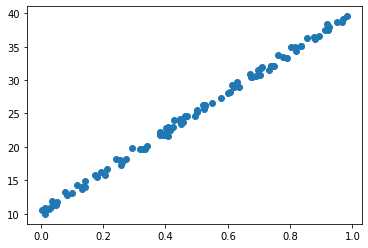

In [57]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], y)

In [36]:
def predict(X, w_b):
    return (X@w_b.reshape(-1, 1)).reshape(-1)

In [160]:
X@w_b

array([0.22942633, 0.3889433 , 0.31944397, 0.43998458, 0.515662  ,
       0.53317685, 0.53116002, 0.42043749, 0.25937814, 0.37172559,
       0.30537811, 0.57987432, 0.47050557, 0.53140127, 0.46736715,
       0.37968191, 0.30012734, 0.23865506, 0.30352035, 0.28736355,
       0.31362637, 0.38357407, 0.51029092, 0.31701771, 0.57063552,
       0.60617503, 0.49594364, 0.1868495 , 0.45305683, 0.26698751,
       0.31583005, 0.34477431, 0.21514893, 0.35380152, 0.50050083,
       0.43022902, 0.52673214, 0.35434624, 0.42853135, 0.3656273 ,
       0.19871226, 0.48917042, 0.42362519, 0.50834661, 0.43341823,
       0.27354531, 0.35178271, 0.32931778, 0.37746121, 0.33014842,
       0.59166837, 0.19274349, 0.52355604, 0.50389309, 0.47079505,
       0.36698213, 0.55178981, 0.59207933, 0.27464752, 0.33764078,
       0.39864466, 0.17771235, 0.28871936, 0.37357871, 0.3095551 ,
       0.46190597, 0.31188619, 0.30709243, 0.35503267, 0.41066768,
       0.64644436, 0.41261107, 0.22551531, 0.45083811, 0.29934

In [161]:
predict(X, w_b)

array([0.22942633, 0.3889433 , 0.31944397, 0.43998458, 0.515662  ,
       0.53317685, 0.53116002, 0.42043749, 0.25937814, 0.37172559,
       0.30537811, 0.57987432, 0.47050557, 0.53140127, 0.46736715,
       0.37968191, 0.30012734, 0.23865506, 0.30352035, 0.28736355,
       0.31362637, 0.38357407, 0.51029092, 0.31701771, 0.57063552,
       0.60617503, 0.49594364, 0.1868495 , 0.45305683, 0.26698751,
       0.31583005, 0.34477431, 0.21514893, 0.35380152, 0.50050083,
       0.43022902, 0.52673214, 0.35434624, 0.42853135, 0.3656273 ,
       0.19871226, 0.48917042, 0.42362519, 0.50834661, 0.43341823,
       0.27354531, 0.35178271, 0.32931778, 0.37746121, 0.33014842,
       0.59166837, 0.19274349, 0.52355604, 0.50389309, 0.47079505,
       0.36698213, 0.55178981, 0.59207933, 0.27464752, 0.33764078,
       0.39864466, 0.17771235, 0.28871936, 0.37357871, 0.3095551 ,
       0.46190597, 0.31188619, 0.30709243, 0.35503267, 0.41066768,
       0.64644436, 0.41261107, 0.22551531, 0.45083811, 0.29934

In [80]:
X

array([[0.96702984, 0.54723225, 1.        ],
       [0.97268436, 0.71481599, 1.        ],
       [0.69772882, 0.2160895 , 1.        ],
       [0.97627445, 0.00623026, 1.        ],
       [0.25298236, 0.43479153, 1.        ],
       [0.77938292, 0.19768507, 1.        ],
       [0.86299324, 0.98340068, 1.        ],
       [0.16384224, 0.59733394, 1.        ],
       [0.0089861 , 0.38657128, 1.        ],
       [0.04416006, 0.95665297, 1.        ]])

In [81]:
w_b

array([0.76740497, 0.17897391, 0.37557577])

In [82]:
0.96702984 * 0.76740497 + 0.54723225 * 0.17897391 + 0.37557577

1.2156195708149022

In [50]:
def loss(y, yp):
#     print(f"y.shape: {y.shape}, yp.shape: {yp.shape}")
    diff = y.flatten() - yp.flatten()
    dsq = diff**2
    return np.mean(dsq)

In [18]:
loss(np.array([1,2]), np.array([21, 4]))

y.shape: (2,), yp.shape: (2,)


202.0

In [58]:
def gradient(X, y, loss, weights, i):
    yp = predict(X, weights)
    l1 = loss(y, yp)
#     print(f"l1: {l1}")
    weights1 = weights.copy()
    delta = 1e-9
    weights1[i] += delta
    yp = predict(X, weights1)
    l2 = loss(y, yp)+ L1_reg(weitghts)
#     print(f"l1: {l1}")
    return (l2 - l1)/delta

In [59]:
np.array([[2,3,4], [20,30,40]]) - [1,1,5]

array([[ 1,  2, -1],
       [19, 29, 35]])

In [60]:
[1, 2].append(0)

In [61]:
def fit(X, y, loss, eta=0.001, epoch = 100):
    rows, cols = X.shape
    # Initialize our weights
    weights = np.array([1.0,2.0, 0.0])
    yp = predict(X, weights)
    l1 = loss(y, yp) + L1_reg(weitghts)
    print(f"weights={weights}, loss={l1}")
    for _ in range(epoch):
        gs = []
        for i in range(cols):
            g = gradient(X, y, loss, weights, i)
            gs.append(g)
        print("gs:", gs)
        gs1 = np.array(gs)
        weights -= eta * gs1
        yp = predict(X, weights)
        l1 = loss(y, yp)
        print(f"weights={weights}, loss={l1}")
    return weights

In [64]:
fit(X, y, loss, eta=0.01, epoch = 2000)

weights=[1. 2. 0.], loss=610.7905975699974
gs: [-27.271426006336696, -22.856170289742295, -46.608306547568645]
weights=[1.27271426 2.2285617  0.46608307], loss=576.9228521603578
gs: [-26.537009034655057, -22.111976250016596, -45.18483365245629]
weights=[1.53808435 2.44968147 0.9179314 ], loss=545.0607762281603
gs: [-25.824874683166854, -21.390292204159778, -43.80456175567815]
weights=[1.7963331  2.66358439 1.35597702], loss=515.085013668005
gs: [-25.13365870981943, -20.690322344307788, -42.46589924150612]
weights=[2.04766968 2.87048761 1.78063601], loss=486.88362742456525
gs: [-24.46341795803164, -20.011839296785183, -41.16765239814413]
weights=[2.29230386 3.070606   2.19231254], loss=460.3510490152031
gs: [-23.81335661993944, -19.35376303663361, -39.90862751379609]
weights=[2.53043743 3.26414363 2.59139881], loss=435.3881038223964
gs: [-23.182565200841054, -18.7157525033399, -38.68746034640935]
weights=[2.76226308 3.45130116 2.97827341], loss=411.901597607183
gs: [-22.570759483642178,

array([28.66848206,  0.53317519, 10.645602  ])

In [222]:
gradient(X, y, loss, np.array([0.95710586, 0.12806452, 0.37293692]), 2)

-47.759272092662286

In [135]:
rows, cols = X.shape
cols

3

In [136]:
weights = np.random.random((cols))

In [137]:
weights

array([0.76775803, 0.04853414, 0.10981812])

In [138]:
yp = predict(X, weights)
yp

array([0.87882249, 0.89129733, 0.65599275, 0.85966305, 0.32514959,
       0.71779009, 0.82011661, 0.2646004 , 0.13547917, 0.19015268])

In [139]:
X

array([[0.96702984, 0.54723225, 1.        ],
       [0.97268436, 0.71481599, 1.        ],
       [0.69772882, 0.2160895 , 1.        ],
       [0.97627445, 0.00623026, 1.        ],
       [0.25298236, 0.43479153, 1.        ],
       [0.77938292, 0.19768507, 1.        ],
       [0.86299324, 0.98340068, 1.        ],
       [0.16384224, 0.59733394, 1.        ],
       [0.0089861 , 0.38657128, 1.        ],
       [0.04416006, 0.95665297, 1.        ]])

In [140]:
np.array([0.96702984, 0.54723225, 1.        ]).dot([0.76775803, 0.04853414, 0.10981812])

0.8788224915436302

In [141]:
l1 = loss(yp, y)

In [142]:
l1

86121.4398138117

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
lr = LinearRegression()

In [195]:
lr.fit(X[:, :2],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
lr.intercept_

array([9.94474916])

In [198]:
lr.coef_

array([[29.93360347,  0.63325444]])

In [236]:
X = np.array([[1, 1], [2, 1]])

In [237]:
weights = np.array([3, 1])

In [238]:
y = np.array([4, 5])

In [239]:
yp = predict(X, weights)

In [240]:
yp

array([4, 7])

In [ ]:
yp = predict(X, weights)
l1 = loss(y, yp)

In [241]:
l1 = loss(y, yp)

In [242]:
l1

2.0

In [243]:
y

array([4, 5])

In [244]:
yp

array([4, 7])

In [246]:
loss(np.array([4, 4]), np.array([4, 7]))

4.5

In [247]:
X

array([[1, 1],
       [2, 1]])

In [248]:
y

array([4, 5])

In [254]:
gradient(X, y, loss, np.array([1, 1]), 0)

0.0

In [255]:
gradient(X, y, loss, np.array([1, 1]), 1)

0.0

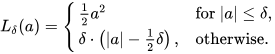

In [72]:
def huber_loss(y, yp):
    a = np.abs(y.flatten() - yp.flatten())
    d = 1
    res = np.where(a < d, 1/2*a*a, a - d/2)
    return np.sum(res)

In [73]:
huber_loss(np.array([1,2,3]), np.array([4,5,6]))

7.5

In [74]:
arr = np.array([0.5, 1, 2])

np.where(arr < 1, 1/2*arr*arr, arr - 1/2)

array([0.125, 0.5  , 1.5  ])

In [75]:
fit(X, y, huber_loss, eta=0.01, epoch = 2000)

weights=[1. 2. 0.], loss=2280.4097906900643
gs: [-48.513356887269765, -49.55563781550154, -99.99985195463523]
weights=[1.48513357 2.49555638 0.99999852], loss=2132.316909151852
gs: [-48.513356887269765, -49.555183068150654, -99.99939720728435]
weights=[1.97026714 2.99110821 1.99999249], loss=1984.2247077137906
gs: [-48.51312951359432, -49.555183068150654, -100.00007932831068]
weights=[2.45539843 3.48666004 2.99999328], loss=1836.1319344611913
gs: [-48.51381163462065, -49.55563781550154, -100.00007932831068]
weights=[2.94053655 3.98221642 3.99999408], loss=1688.038604936327
gs: [-48.51312951359432, -49.55563781550154, -99.99985195463523]
weights=[3.42566784 4.4777728  4.9999926 ], loss=1539.9458337046035
gs: [-48.513356887269765, -49.555865189176984, -100.00030670198612]
weights=[3.91080141 4.97333145 5.99999566], loss=1392.3690483919347
gs: [-48.481069825356826, -48.38216227653902, -98.58536031970289]
weights=[4.39561211 5.45715307 6.98584927], loss=1251.0502306878823
gs: [-48.40626388

array([29.93360357,  0.63325442,  9.94474933])

In [78]:
# You have a list people compare each person against everyone.
people = np.array([
    [1,2,3],
    [3,4,5],
    [6,7,8],
    [4,5,5]
])

In [83]:
lens = np.sqrt(np.sum(people**2, axis=1))

In [86]:
lens = lens.reshape(-1, 1)

In [87]:
lens

array([[ 3.74165739],
       [ 7.07106781],
       [12.20655562],
       [ 8.1240384 ]])

In [91]:
upeople = people / lens

In [94]:
upeople

array([[0.26726124, 0.53452248, 0.80178373],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.49236596, 0.61545745, 0.61545745]])

In [93]:
np.sum(upeople**2, axis=1)

array([1., 1., 1., 1.])

In [89]:
1/3.74165739, 2/ 3.74165739, 3/3.74165739

(0.2672612416819916, 0.5345224833639832, 0.801783725045975)

In [145]:
sim = upeople@upeople.T

In [147]:
np.fill_diagonal(sim, 0)

In [148]:
sim

array([[0.        , 0.98270763, 0.96337534, 0.95402996],
       [0.98270763, 0.        , 0.99636925, 0.99224264],
       [0.96337534, 0.99636925, 0.        , 0.99832074],
       [0.95402996, 0.99224264, 0.99832074, 0.        ]])

In [149]:
np.argmax(sim, axis=1)

array([1, 2, 3, 2])

In [96]:
coeffs = np.array([
    [3, 10, 2],
    [2, 4, 1],
    [1, 1, 1]
])

variabs = np.array([
    [10, 5, 2],
    [11, 6, 3]
])

In [98]:
variabs.T

array([[10, 11],
       [ 5,  6],
       [ 2,  3]])

In [97]:
coeffs @ variabs.T

array([[84, 99],
       [42, 49],
       [17, 20]])

In [99]:
#Matrix Multiplication
# dot product - cosine similarities
# solving equations

In [100]:
x = np.array([10, 12, 13, 14]).reshape(-1,1)
m = 10
c = 5
delta = 1e-5


In [101]:
x

array([[10],
       [12],
       [13],
       [14]])

In [103]:
ws = np.array([[m+delta, c], [m , c + delta]]).T

In [104]:
ws

array([[10.00001, 10.     ],
       [ 5.     ,  5.00001]])

In [106]:
ones = np.ones((4, 1))

In [107]:
ones

array([[1.],
       [1.],
       [1.],
       [1.]])

In [112]:
x1 = np.concatenate((x, ones), axis=1)

In [113]:
x1

array([[10.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.]])

In [114]:
ws

array([[10.00001, 10.     ],
       [ 5.     ,  5.00001]])

In [115]:
x1 @ ws

array([[105.0001 , 105.00001],
       [125.00012, 125.00001],
       [135.00013, 135.00001],
       [145.00014, 145.00001]])

In [119]:
weights = np.array([10, 5, 20])

In [120]:
weights

array([10,  5, 20])

#needed

    [
        [10.1, 5,   20],
        [10,   5.1, 20],
        [10,   5,   20.1]
    ]


In [130]:
l = weights.shape[0]

In [131]:
l

3

In [143]:
ws = weights + np.diag(np.full(l, 0.001))
ws.T

array([[10.001, 10.   , 10.   ],
       [ 5.   ,  5.001,  5.   ],
       [20.   , 20.   , 20.001]])

In [141]:
x1

array([[10.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.]])

# Questions:

1. You have a list of persons, each person is a vector representing its characters. 
First, convert each person to a unit vector. And then find the cosine similarities between every pair. 
Find most similar person to each person.

2.  You have X and y find all values of y_predict at given weights. Find MSE loss at given weights.
Then compute the gradient of mse loss with respect to each weight.

3. Add L1 and L2 regularization loss and train and test

4. Using numpy, create HuberLoss function and train model.

5. Generate Non-linear data such as tax data. Then try various ideas such as:

## idea 1

y1 = m1*x + c1
y2 = m2*x + c2
y3 = m3*x + c3
y = m4*y1+m5*y2+m6*y3 + c4


## idea 2

y = m1 * x^m2 + c


## idea 3

y1 = x^m1
y2 = x^m2
y3 = x^m3
y = m4*y1+m5*y2+m6*y3 + c4

## Idea 4

def act(x):
    if x < 0:
        return 0
    return x
    
y1 = act(m1*x + c1)
y2 = act(m2*x + c2)
y3 = act(m3*x + c3)
y = m4*y1+m5*y2+m6*y3 + c4